# Step 1: Import Libraries and Load the Dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

file_path = '/Users/alielsamra/Desktop/ali agenda/CAREER/GITHUB PROJECTS/Smartwatch Data Analysis/dailyActivity_merged.csv' 
data = pd.read_csv(file_path)

*Explore the dataset*

In [35]:
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [36]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


No null values

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

# Step 2: Preprocessing Data

We convert the date column into a datetime format for further analysis and add a column for total minutes.

In [38]:
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], format="%m/%d/%Y")
print("\nUpdated dataset information:")
print(data.info())

# create a TotalMinutes column
data["TotalMinutes"] = (
    data["VeryActiveMinutes"] +
    data["FairlyActiveMinutes"] +
    data["LightlyActiveMinutes"] +
    data["SedentaryMinutes"]
)
print("\nSample of TotalMinutes column:")
print(data["TotalMinutes"].sample(5))


Updated dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64       

# Step 3: Descriptive Statistics

In [39]:
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     940.000000       940.000000                940.000000   
mean        5.489702         5.475351                  0.108171   
min         0.000000         0.000000                  0.000000   
25%         2.620000         2.620000                  0.000000   
50%         5.245000         5.245000               

1. Total Steps:
    Avg: ~7,638 steps/day; Max: 36,019; Median: 7,405.
2. Very Active Minutes:
    Avg: ~21 minutes/day; Max: 210; Many users have 0 active minutes (25th percentile = 0).
3. Calories:
    Avg: ~2,303/day; Range: 0 to 4,900.
4. Total Minutes:
    Most days log 1,440 minutes (full day), indicating consistent data.

**Next Steps:**

	• Investigate days with 0 steps or calories (data errors/sedentary days).
	• Correlate steps/active minutes with calories burned.
	• Visualize activity level distributions or trends over time.

# Step 4: Relationship Analysis (Calories vs. Steps)

In [40]:
figure = px.scatter(
    data_frame=data,
    x="Calories",
    y="TotalSteps",
    size="VeryActiveMinutes",
    trendline="ols",
    title="Relationship between Calories & Total Steps"
)
figure.show()

•	Trend: Higher steps = higher calorie burn.
•	Outliers: Some high-step points show low calories, suggesting intensity differences or data inconsistencies.

# Step 5: Average Active Minutes Analysis

In [41]:
label = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold', 'lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='black', width=3))
)
fig.show()

1.	Inactive Minutes dominate:
    * ~991 minutes/day, indicating 68.3% of the day is spent sedentary.
2.	Lightly Active Minutes:
    * ~192 minutes/day (~13.3%), showing low-intensity activities make up a significant portion.
3.	Very Active Minutes:
    * ~21 minutes/day (~1.5%), representing high-intensity activities.
4.	Fairly Active Minutes:
    * ~13.5 minutes/day (~1%), minimal medium-intensity activities.

# Step 6: Add Day Column and Activity by Day

In [42]:
data["Day"] = data["ActivityDate"].dt.day_name()
print("\nSample of Day column:")
print(data["Day"].head())


Sample of Day column:
0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


In [43]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data["Day"], y=data["VeryActiveMinutes"], name='Very Active', marker_color='purple'))
fig.add_trace(go.Bar(x=data["Day"], y=data["FairlyActiveMinutes"], name='Fairly Active', marker_color='green'))
fig.add_trace(go.Bar(x=data["Day"], y=data["LightlyActiveMinutes"], name='Lightly Active', marker_color='pink'))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Lightly Active Minutes dominate daily activity across all days.
Very Active and Fairly Active Minutes are minimal throughout the week.
Activity levels are consistent, with no major variations across days.

# Step 7: Inactive Minutes by Day

In [44]:
day_counts = data["Day"].value_counts()
label = day_counts.index
counts = data["SedentaryMinutes"]
colors = ['gold', 'lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='black', width=3))
)
fig.show()

Most Inactive Day:
* Monday (1218 minutes) has the highest sedentary time, followed by Thursday (1149 minutes).

Least Inactive Day:
* Sunday (539 minutes) has the lowest sedentary time, indicating more activity on weekends.

Variation:
* Weekdays generally have higher inactive minutes compared to weekends.

# Step 8: Calories by Day

In [45]:
calories_counts = data["Day"].value_counts()
label = calories_counts.index
counts = data["Calories"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='black', width=3))
)
fig.show()

Most Calories Burned:
* Tuesday (1985 calories) has the highest calorie burn, followed closely by Monday (1921 calories).

Least Calories Burned:
* Sunday (1728 calories) shows the lowest calorie burn, aligning with typically lower activity on weekends.

General Trend:
* Weekdays generally have higher calorie burn compared to weekends, indicating more physical activity during workdays.


# Step 9: Add Predictive Analysis

## First model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# select features and target variable
features = ["TotalSteps", "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes"]
X = data[features]
y = data["Calories"]

In [48]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# make predictions
y_pred = model.predict(X_test)

In [51]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 272465.1393221535
R-Squared: 0.4235664304312009


1.	Mean Squared Error (MSE):
* Value: 272465.14
* This indicates the average squared difference between the predicted and actual calories burned. While it’s a reasonable starting point, there is room to improve the model by adding more features or using advanced algorithms.

2.	R-Squared:
* Value: 0.4236
* This means ~42.36% of the variability in calories burned can be explained by the selected features (TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes). While it’s not perfect, it shows a moderate correlation.ro

## Second model (improved)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# include additional features for the improved model
improved_features = [
    "TotalSteps", 
    "VeryActiveMinutes", 
    "FairlyActiveMinutes", 
    "LightlyActiveMinutes", 
    "SedentaryMinutes", 
    "TotalDistance"
]
X_improved = data[improved_features]
y = data["Calories"]

In [54]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size=0.2, random_state=42)

In [55]:
# train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# make predictions
y_pred_improved = rf_model.predict(X_test)

In [57]:
# evaluate the improved model
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Model - Mean Squared Error: {mse_improved}")
print(f"Improved Model - R-Squared: {r2_improved}")

Improved Model - Mean Squared Error: 158583.0258195889
Improved Model - R-Squared: 0.6644980716666159


In [58]:
# Step 1: Install XGBoost (if not installed)
# Uncomment and run this command in your environment
# !pip install xgboost

# Step 2: Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,    # Number of trees
    learning_rate=0.1,   # Step size for optimization
    max_depth=6,         # Maximum depth of each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 5: Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - Mean Squared Error: {mse_xgb}")
print(f"XGBoost Model - R-Squared: {r2_xgb}")

XGBoost Model - Mean Squared Error: 172098.67767076773
XGBoost Model - R-Squared: 0.63590407371521


In [59]:
# Step 1: Create additional features
data["Intensity"] = (
    3 * data["VeryActiveMinutes"] + 
    2 * data["FairlyActiveMinutes"] + 
    1 * data["LightlyActiveMinutes"]
)  # Weighting active minutes by intensity

data["ActiveToInactiveRatio"] = (
    (data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"]) /
    (data["SedentaryMinutes"] + 1)  # Adding 1 to avoid division by zero
)

# Step 2: Update feature list
improved_features = [
    "TotalSteps", 
    "VeryActiveMinutes", 
    "FairlyActiveMinutes", 
    "LightlyActiveMinutes", 
    "SedentaryMinutes", 
    "TotalDistance", 
    "Intensity", 
    "ActiveToInactiveRatio"
]

# Update X and y
X_improved = data[improved_features]
y = data["Calories"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size=0.2, random_state=42)

In [60]:
# Step 4: Train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,    # Number of trees
    learning_rate=0.1,   # Step size for optimization
    max_depth=6,         # Maximum depth of each tree
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Enhanced XGBoost Model - Mean Squared Error: {mse_xgb}")
print(f"Enhanced XGBoost Model - R-Squared: {r2_xgb}")

Enhanced XGBoost Model - Mean Squared Error: 167580.4391655382
Enhanced XGBoost Model - R-Squared: 0.6454629898071289


## Third model (last and best model)

In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# extract feature importance
feature_importance = xgb_model.feature_importances_
features = improved_features

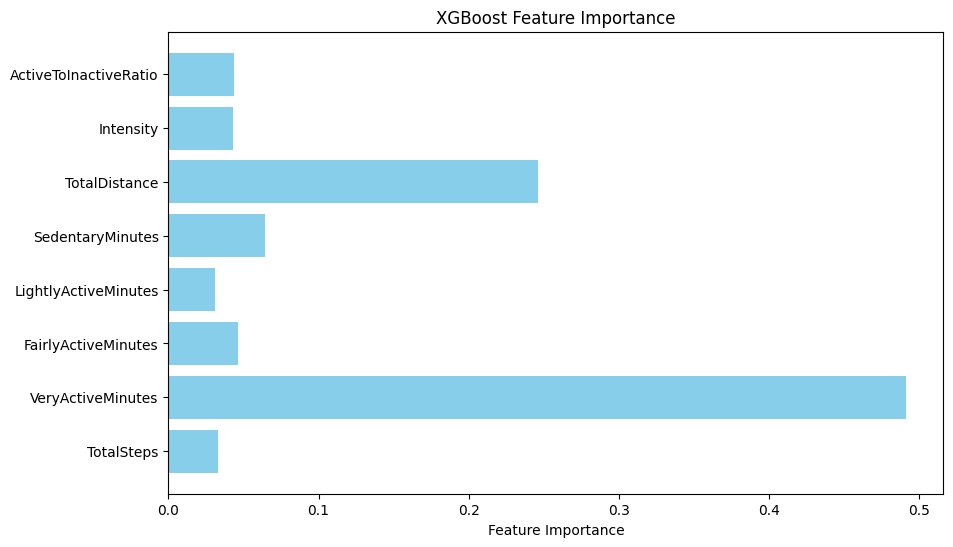

In [63]:
# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
# we're gonna use xgboost but find its best paramteres using Gridsearch
# parameter grid for XGBoost
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# initialize GridSearchCV with XGBoost Regressor
xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring="r2",
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# fit the GridSearchCV
xgb_grid.fit(X_train, y_train)

# get the best parameters and best score
best_params = xgb_grid.best_params_
best_score = xgb_grid.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best R-Squared from GridSearchCV: {best_score}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

In [65]:
# train the model with best parameters
xgb_best = XGBRegressor(**best_params, random_state=42)
xgb_best.fit(X_train, y_train)

# evaluate on the test set
y_pred_best = xgb_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Final Model - Mean Squared Error: {mse_best}")
print(f"Final Model - R-Squared: {r2_best}")

Final Model - Mean Squared Error: 162320.7499727627
Final Model - R-Squared: 0.656590461730957


1.	Mean Squared Error (MSE):
* Value: 162,320.75
* A significant reduction compared to the original Linear Regression model (MSE: 272,465.14) and comparable to the Random Forest Regressor.
2.	R-Squared:
* Value: 0.6566
* Indicates that ~65.66% of the variance in calorie burn is explained by the optimized XGBoost model, showcasing strong predictive capability.

In [66]:
import joblib

# save the optimized model
joblib.dump(xgb_best, "final_xgboost_calorie_predictor.pkl")
print("Model saved as 'final_xgboost_calorie_predictor.pkl'")

Model saved as 'final_xgboost_calorie_predictor.pkl'
